In [4]:
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

/Users/i309911/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/i309911/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
import xgboost as xgb
import lightgbm as lgb

In [6]:
traindf = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')

In [7]:
traindf.isnull().values.any()

False

In [8]:
print len(traindf.columns)
print len(test.columns)

44
42


In [9]:
traindf.head()

,index,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
0,0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,511,511,255,255,2
1,1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,511,511,255,255,0
2,2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,511,511,255,255,0
3,3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,511,511,255,255,0
4,4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,511,511,255,255,2


In [10]:
test.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23
0,cxcon_2,0,331,6085,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,13,13,255,255
1,cxcon_5,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255
2,cxcon_8,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255
3,cxcon_11,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,510,509,255,255
4,cxcon_14,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255


0    98868
2    36854
1    33585
Name: target, dtype: int64

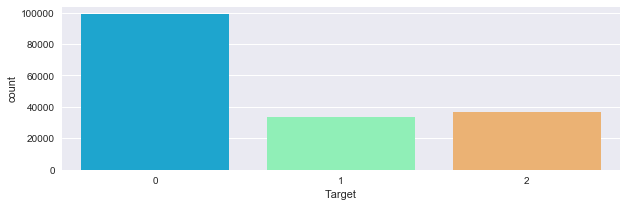

In [11]:
plt.figure(figsize=(10,3))
sns.countplot(traindf['target'],palette='rainbow')
plt.xlabel('Target')
traindf['target'].value_counts()

In [12]:
cont_features = traindf.columns[traindf.columns.str.startswith('cont')] 
cat_features = traindf.columns[traindf.columns.str.startswith('cat')] 

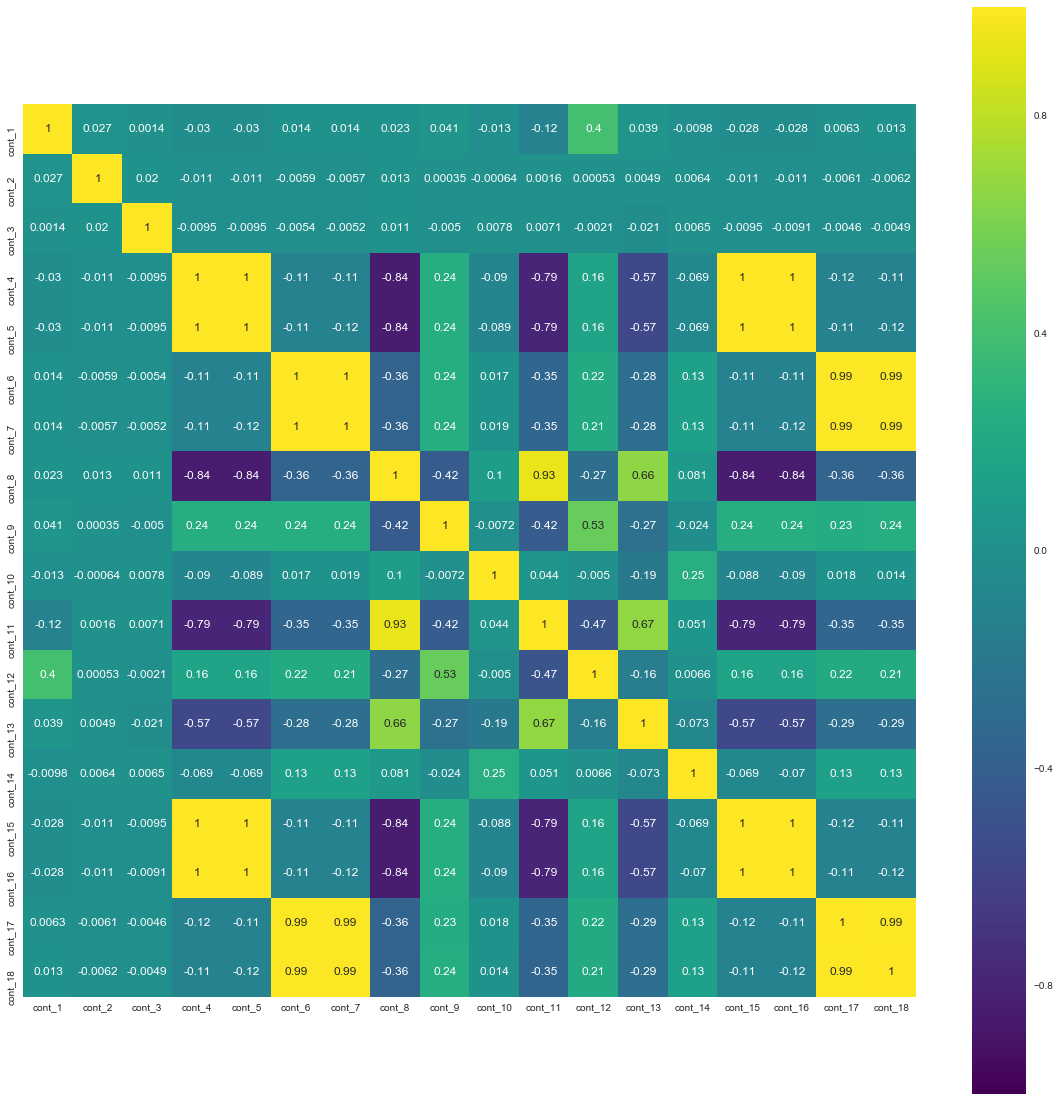

In [13]:
colormap = plt.cm.viridis
corr = traindf[cont_features].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr , cmap= colormap , square=True , annot= True)

In [14]:
drop_list = ['cont_4' , 'cont_6' , 'cont_8' , 'cont_15' , 'cont_17' ]
traindf = traindf.drop(drop_list ,axis=1 )
test = test.drop(drop_list ,axis=1 ) 

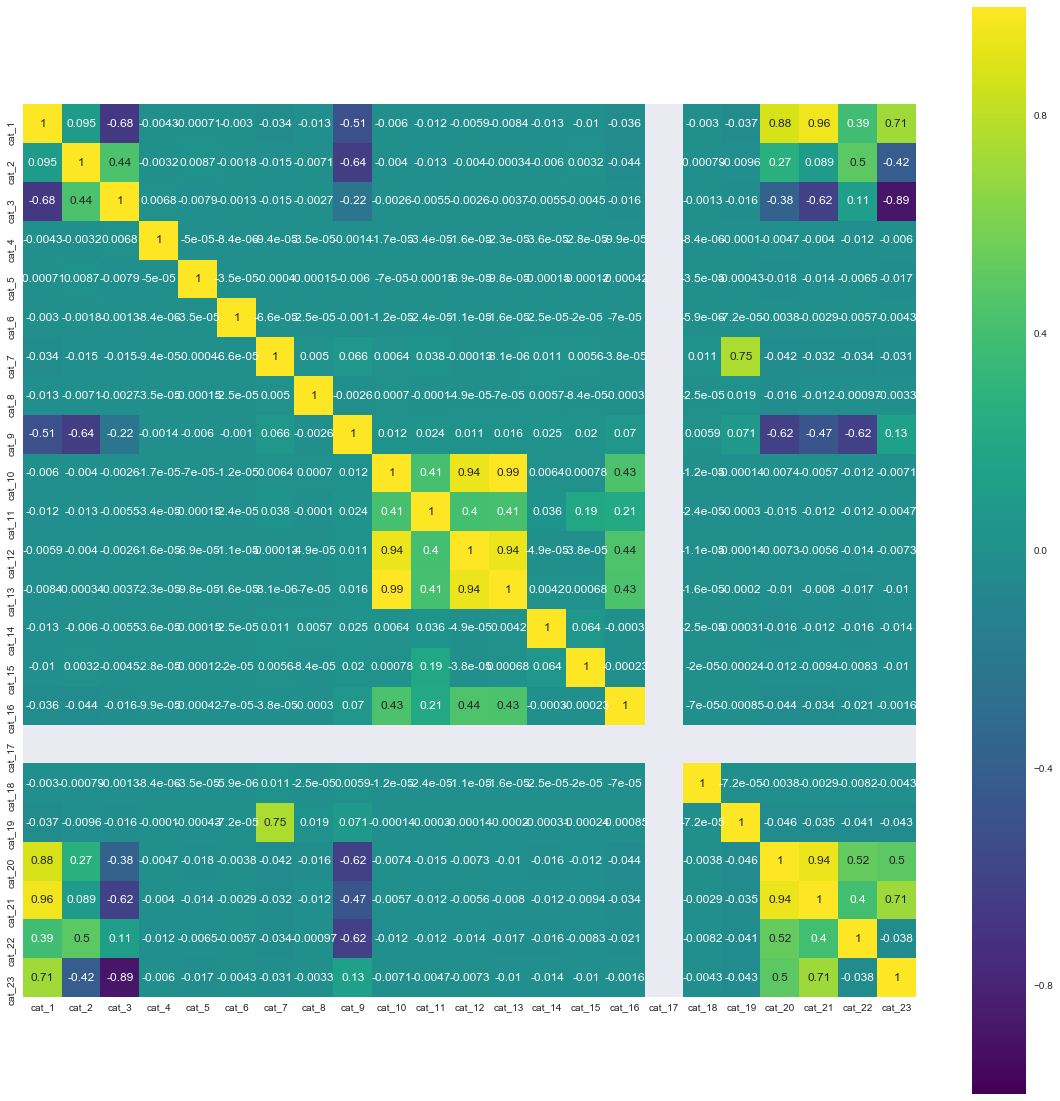

In [15]:
colormap = plt.cm.viridis
corr = traindf[cat_features].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr , cmap= colormap , square=True , annot= True)

In [16]:
drop_list = [ 'cat_4','cat_5','cat_6','cat_8','cat_10', 'cat_11' , 'cat_12' , 'cat_13' , 'cat_14' , 'cat_15', 'cat_16',
             'cat_17' , 'cat_18' , 'cat_19' ]
traindf = traindf.drop(drop_list ,axis=1 )
test = test.drop(drop_list ,axis=1 ) 

In [17]:
print traindf.shape
print test.shape

(169307, 25)
(91166, 23)


In [18]:
cont_features = traindf.columns[traindf.columns.str.startswith('cont')] 
cat_features = traindf.columns[traindf.columns.str.startswith('cat')] 

In [19]:
traindf[cont_features].describe()

,cont_1,cont_2,cont_3,cont_5,cont_7,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_16,cont_18
count,169307.000000,1.693070e+05,1.693070e+05,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000,169307.000000
mean,44.136722,1.077011e+03,7.501477e+02,0.171479,0.062478,0.021317,0.028090,0.755858,0.030386,0.601241,0.006442,0.171341,0.062327
std,659.337783,4.302746e+04,3.527929e+04,0.376593,0.241354,0.084299,0.139745,0.409922,0.107547,0.481976,0.041425,0.376465,0.239554
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000
max,42596.000000,1.139690e+07,1.173059e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
traindf['cont_1'] = min_max_scaler.fit_transform(traindf['cont_1'].reshape(-1,1))

/Users/i309911/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/Users/i309911/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
test['cont_1'] = min_max_scaler.transform(test['cont_1'].reshape(-1,1))

/Users/i309911/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [22]:
target = traindf['target']
traindf = traindf.drop(['target' , 'connection_id'] , axis=1 )

In [23]:
test = test.drop(['connection_id'] , axis= 1)

In [24]:
X_train = traindf[cont_features]
X_test = test[cont_features]

In [25]:
traindf.shape

(169307, 23)

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
for col in cat_features:
    data=traindf[[col]].append(test[[col]])
    enc.fit(data)
    # Fitting One Hot Encoding on train data
    temp = enc.transform(traindf[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
    # In side by side concatenation index values should be same
    # Setting the index values similar to the X_train data frame
    temp=temp.set_index(traindf.index.values)
    # adding the new One Hot Encoded varibales to the train data frame
    X_train=pd.concat([X_train,temp],axis=1)
    # fitting One Hot Encoding on test data
    temp = enc.transform(test[[col]])
    # changing it into data frame and adding column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
    # Setting the index for proper concatenation
    temp=temp.set_index(test.index.values)
    # adding the new One Hot Encoded varibales to test data frame
    X_test=pd.concat([X_test,temp],axis=1)


In [ ]:
print X_train.shape
print X_test.shape

In [ ]:
xgb_clf= xgb.XGBClassifier()

In [89]:
from sklearn.model_selection import KFold

In [27]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [28]:
from vecstack import stacking
from vecstack import stacking
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [92]:
X_test.shape

(91166, 1519)

In [30]:
lgb_params = {}
lgb_params['learning_rate'] = 0.02
lgb_params['n_estimators'] = 650
lgb_params['max_bin'] = 10
lgb_params['subsample'] = 0.8
lgb_params['subsample_freq'] = 10
lgb_params['colsample_bytree'] = 0.8   
lgb_params['min_child_samples'] = 500
lgb_params['seed'] = 99

In [34]:
lgb_params2 = {}
lgb_params2['n_estimators'] = 1090
lgb_params2['learning_rate'] = 0.02
lgb_params2['colsample_bytree'] = 0.3   
lgb_params2['subsample'] = 0.7
lgb_params2['subsample_freq'] = 2
lgb_params2['num_leaves'] = 16
lgb_params2['seed'] = 99

In [32]:
lgb_clf = lgb.LGBMClassifier(**lgb_params)

In [50]:
models = [
    lgb.LGBMClassifier(**lgb_params),
    lgb.LGBMClassifier(**lgb_params2)
    #AdaBoostClassifier(**ada_params)
    #GradientBoostingClassifier(**gb_params)
]

In [51]:
S_train , S_test = stacking(models , X_train.as_matrix() , target.as_matrix() , X_test.as_matrix() , regression=False , metric=accuracy_score , n_folds = 4, 
    stratified = True, shuffle = True, random_state = 0, verbose = 2)

task:   [classification]
metric: [accuracy_score]

model 0: [LGBMClassifier]
    fold 0: [0.78042903]
    fold 1: [0.78035297]
    fold 2: [0.78048953]
    fold 3: [0.78072580]
    ----
    MEAN:   [0.78049933]

model 1: [LGBMClassifier]
    fold 0: [0.78073616]
    fold 1: [0.78073098]
    fold 2: [0.78096206]
    fold 3: [0.78100931]
    ----
    MEAN:   [0.78085962]

model 2: [LGBMClassifier]
    fold 0: [0.78075978]
    fold 1: [0.78063647]
    fold 2: [0.78077305]
    fold 3: [0.78108019]
    ----
    MEAN:   [0.78081237]



In [27]:
param_test1 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = xgb_clf,param_grid = param_test1, cv=3 )
gsearch1.fit(X_train, target)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.78073, std: 0.00007, params: {'gamma': 0.0},
  mean: 0.78077, std: 0.00013, params: {'gamma': 0.1},
  mean: 0.78073, std: 0.00010, params: {'gamma': 0.2},
  mean: 0.78075, std: 0.00009, params: {'gamma': 0.3},
  mean: 0.78078, std: 0.00007, params: {'gamma': 0.4}],
 {'gamma': 0.4},
 0.7807828382760311)

In [37]:
xgb_clf= xgb.XGBClassifier(learning_rate=0.1, max_depth= 6, n_estimators= 100 , objective='multi:softmax' , gamma= 0.9)

In [39]:
xgb_clf.fit(S_train, target)

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0.9,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, n_estimators=100, nthread=-1,
       objective='multi:softprob', seed=0, silent=True, subsample=1)

In [53]:
cross_val_score(xgb_clf , S_train , target , cv=3)

array([ 0.7810263 ,  0.78090226,  0.78105785])

In [52]:
np.mean([ 0.7810263 ,  0.78091998,  0.78114645])

0.78103091000000002

In [ ]:
np.mean([ 0.78090226,  0.78054788,  0.78066803])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

clf = RandomForestClassifier(n_estimators = 100,random_state=0)
clf.fit(X_train[cont_features], target)
#importances = clf.feature_importances_
#indices = np.argsort(importances)[::-1]
#for i in range(len(indices)):
#    print (cont_features[indices[i]],importances[indices[i]])

In [ ]:
cross_val_score(clf , good_data, taget)

In [ ]:
cat_features = X_train.columns[X_train.columns.str.startswith('cat')] 

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

In [ ]:
train

In [56]:
clf3 = LinearSVC(C=0.1)

scores = cross_val_score(clf3 ,X_train ,target )

In [ ]:
clf3.fit(X_train , taget)

In [ ]:
print scores
scores.mean()

In [54]:
clf1 = LogisticRegression(C=0.1)
scores = cross_val_score(clf1 ,S_train, target )

In [55]:
print scores
scores.mean()

[ 0.78061875  0.78054788  0.78052627]


0.78056430012916789

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf2= DecisionTreeClassifier(min_samples_split= 10)
scores_tree = cross_val_score(clf2 , X_train , target)
print scores_tree
scores_tree.mean()

In [ ]:
clf1.fit(train, target)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf4 = GradientBoostingClassifier()
cross_val_score(clf4 ,good_data, taget )

In [ ]:
test_features = [x for x in X_test.columns if x not in ['connection_id','target']]

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [40]:
#connextion_test = test['connection_id']
#test = test.drop(['connection_id'] , axis=1)
y = xgb_clf.predict(S_test)

In [41]:
y

array([1, 0, 0, ..., 0, 0, 1])

In [42]:
test['target'] = y

In [43]:
test2 = pd.read_csv('./test_data.csv')

In [44]:
connextion_test = test2['connection_id']

In [45]:
test['connection_id'] = connextion_test

In [46]:
test[['connection_id', 'target']].to_csv('./result.csv' , index = False)